In [1]:
import requests
from bs4 import BeautifulSoup as BS 
import pandas as pd

In [2]:
URL='https://www.usinflationcalculator.com/inflation/current-inflation-rates/#google_vignette'
response=requests.get(URL)

In [3]:
type(response)

requests.models.Response

In [4]:
response.status_code

200

'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#"> <!--<![endif]-->\r\n<head>\r\n    \r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://www.usinflationcalculator.com/xmlrpc.php" />\r\n    \n\t\t<!-- All in One SEO 4.5.0 - aioseo.com -->\r\n\t\t<link media="all" href="https://www.usinflationcalculator.com/wp-content/cache/autoptimize/css/autoptimize_c5874e54cfdc92492178768e7a9f2bb9.css" rel="stylesheet"><link media="screen" href="https://www.usinflationcalculator.com/wp-content/cache/autoptimize/css/autoptimize_b1b49ef44ac1c3bcefc487db23e4f7ca.css" rel="stylesheet"><title>Current US Inflation Rates: 2000-2023</title>\n\t\t<meta name="description" content="The annual inflation rate for the United States was 3.
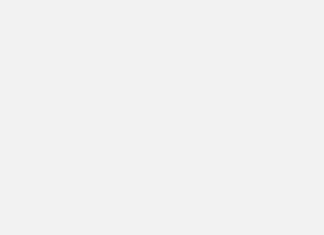
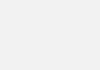
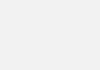
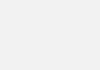
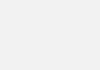
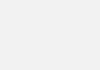
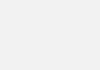

In [5]:
response.text

In [6]:
soup = BS(response.text)

In [7]:
soup

<!DOCTYPE html>
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]--><!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.usinflationcalculator.com/xmlrpc.php" rel="pingback"/>
<!-- All in One SEO 4.5.0 - aioseo.com -->
<link href="https://www.usinflationcalculator.com/wp-content/cache/autoptimize/css/autoptimize_c5874e54cfdc92492178768e7a9f2bb9.css" media="all" rel="stylesheet"/><link href="https://www.usinflationcalculator.com/wp-content/cache/autoptimize/css/autoptimize_b1b49ef44ac1c3bcefc487db23e4f7ca.css" media="screen" rel="stylesheet"/><title>Current US Inflation Rates: 2000-2023</title>
<meta content="The annual inflation rate for the United States was 3.1% for the 12 months ended November, compared to 3.2% previously, according to U.S. Labor

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://www.usinflationcalculator.com/xmlrpc.php" rel="pingback"/>
  <!-- All in One SEO 4.5.0 - aioseo.com -->
  <link href="https://www.usinflationcalculator.com/wp-content/cache/autoptimize/css/autoptimize_c5874e54cfdc92492178768e7a9f2bb9.css" media="all" rel="stylesheet"/>
  <link href="https://www.usinflationcalculator.com/wp-content/cache/autoptimize/css/autoptimize_b1b49ef44ac1c3bcefc487db23e4f7ca.css" media="screen" rel="stylesheet"/>
  <title>
   Current US Inflation Rates: 2000-2023
  </title>
  <meta content="The annual inflation rate for the United States was 3.1% for the 12 months ended November, compared to 3.2% previ

In [9]:
table = soup.find_all('table')[0]

In [10]:
table

<table cellpadding="0" cellspacing="0" width="100%">
<tr height="17">
<td align="right" height="17"><strong>Year</strong></td>
<td align="right"><strong>Jan</strong></td>
<td align="right"><strong>Feb</strong></td>
<td align="right"><strong>Mar</strong></td>
<td align="right"><strong>Apr</strong></td>
<td align="right"><strong>May</strong></td>
<td align="right"><strong>Jun</strong></td>
<td align="right"><strong>Jul</strong></td>
<td align="right"><strong>Aug</strong></td>
<td align="right"><strong>Sep</strong></td>
<td align="right"><strong>Oct</strong></td>
<td align="right"><strong>Nov</strong></td>
<td align="right"><strong>Dec</strong></td>
<td align="right"><strong>Ave</strong></td>
</tr>
<tr>
<td align="right" height="17"><strong>2023</strong></td>
<td align="center">6.4</td>
<td align="center">6.0</td>
<td align="center">5.0</td>
<td align="center">4.9</td>
<td align="center">4.0</td>
<td align="center">3.0</td>
<td align="center">3.2</td>
<td align="center">3.7</td>
<td align

In [11]:
df = pd.read_html(str(table))[0]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
1,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,Avail. Jan. 11,NaN
2,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
3,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
4,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
5,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
6,2018,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
7,2017,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2,2.0,2.2,2.1,2.1
8,2016,1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,1.3
9,2015,-0.1,0.0,-0.1,-0.2,0.0,0.1,0.2,0.2,0.0,0.2,0.5,0.7,0.1


In [12]:
df.columns = df.iloc[0]
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
1,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,Avail. Jan. 11,NaN
2,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
3,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
4,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
5,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
6,2018,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
7,2017,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2,2.0,2.2,2.1,2.1
8,2016,1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,1.3
9,2015,-0.1,0.0,-0.1,-0.2,0.0,0.1,0.2,0.2,0.0,0.2,0.5,0.7,0.1


In [13]:
#drop few rows
inflation_usfoodimport=df.drop(labels=[0,1], axis=0)

In [14]:
inflation_usfoodimport

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
2,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
3,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
4,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
5,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
6,2018,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
7,2017,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2,2.0,2.2,2.1,2.1
8,2016,1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,1.3
9,2015,-0.1,0.0,-0.1,-0.2,0.0,0.1,0.2,0.2,0.0,0.2,0.5,0.7,0.1
10,2014,1.6,1.1,1.5,2.0,2.1,2.1,2.0,1.7,1.7,1.7,1.3,0.8,1.6
11,2013,1.6,2.0,1.5,1.1,1.4,1.8,2.0,1.5,1.2,1.0,1.2,1.5,1.5


In [15]:
inflation_usfoodimport.to_csv('inflation_usfoodimport.csv')